In [1]:
# import the package
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from control.matlab import *

 The transfer function between the elevator and altitude of the Boeing 747 aircraft is approximated:
 

$$\frac{h(s)}{\delta_e(s)} = \frac{30(s-6)}{s(s^2 + 4s + 13)}$$


In [2]:
wn = np.sqrt(13)         # rad/s
zeta = 2/wn             # 2*zeta*wn = 4
u = -1                  # u = delta_e
s = tf('s')             # Laplace variable

In [3]:
# TF Boeing 747 aircraft
# Open Loop
G = u*30*(s - 6) / (s**3 + 4*s**2 + 13*s)

# Impulse response
t1, y_open = impulse(G)

tr = 1.8 / wn
ts = 4.6 /( zeta*wn )
Mp = np.exp(-(zeta / np.sqrt(1 - zeta**2))*np.pi)

pole(G)

array([-2.+3.j, -2.-3.j,  0.+0.j])

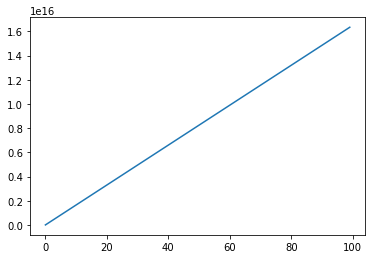

In [6]:
plt.plot(y_open)

In [4]:
damp(G)

_____Eigenvalue______ Damping___ Frequency_
        -2        +3j     0.5547      3.606
        -2        -3j     0.5547      3.606
         0                     1         -0


/home/joaomh/anaconda3/lib/python3.8/site-packages/control/lti.py:109: RuntimeWarning: invalid value encountered in true_divide
  Z = -real(splane_poles)/wn


(array([3.60555128, 3.60555128, 0.        ]),
 array([0.5547002, 0.5547002,       nan]),
 array([-2.+3.j, -2.-3.j,  0.+0.j]))

In [5]:
stepinfo(G)

{'RiseTime': 2306936793322379.5,
 'SettlingTime': 4106674717190903.0,
 'SettlingMin': 1.3063033412822524e+16,
 'SettlingMax': 1.4498585618836332e+16,
 'Overshoot': 0.0,
 'Undershoot': 0.0,
 'Peak': 1.4498585618836332e+16,
 'PeakTime': 1.634489259949686e+16,
 'SteadyStateValue': 1.4498585618836332e+16}

In [11]:
# Closed Loop
K = 0.063
G2 = feedback(K*G,1)
t2, y_closed = impulse(G2)
pole(G2)

array([-1.22452476+2.41084727j, -1.22452476-2.41084727j,
       -1.55095047+0.j        ])

In [16]:
damp(G2)

_____Eigenvalue______ Damping___ Frequency_
    -1.225    +2.411j     0.4529      2.704
    -1.225    -2.411j     0.4529      2.704
    -1.551                     1      1.551


(array([2.70400545, 2.70400545, 1.55095047]),
 array([0.45285588, 0.45285588, 1.        ]),
 array([-1.22452476+2.41084727j, -1.22452476-2.41084727j,
        -1.55095047+0.j        ]))

In [17]:
# Time Domain Specification
stepinfo(G2)

{'RiseTime': 1.0071117130237006,
 'SettlingTime': 3.4390576109502504,
 'SettlingMin': 0.9002192463022002,
 'SettlingMax': 1.010231225475979,
 'Overshoot': 1.0895832506534564,
 'Undershoot': -0.018521883628214903,
 'Peak': 1.010231225475979,
 'PeakTime': 2.2373902260924257,
 'SteadyStateValue': 0.9993425563651721}

100

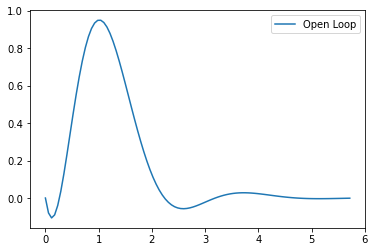

In [12]:
#plt.plot(y_open, t1)
plt.plot(y_closed, t2)
plt.legend(['Open Loop','Closed Loop'])

In [44]:
# Zeros influence 
# Change the poles = change the natural frequency and damping
# But if we changed the zeros?
H1 =  30*(s + 6) / (s*(s**2 + 4*s + 13))  
H2 =  30*(s + 2) / (s*(s**2 + 4*s + 13))    
H3 = -30*(s - 6) / (s*(s**2 + 4*s + 13))  

In [75]:
H3


    -30 s + 180
------------------
s^3 + 4 s^2 + 13 s

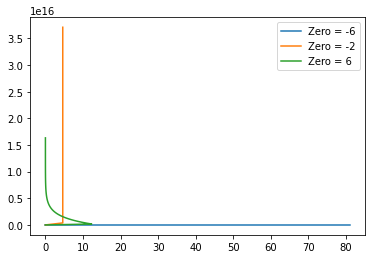

In [69]:
# Plot
y_H1, t1 = impulse(H1,t)
plt.plot(t1,y_H1)
t2, y_H2 = impulse(H2)
plt.plot(t2,y_H2)
t3, y_H3 = impulse(H3)
plt.plot(t3,y_H3)
plt.legend(['Zero = -6','Zero = -2','Zero = 6'])
